In [1]:
from ase.io import read
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(["science", "notebook"])

In [6]:
traj = read("chignolin_md_scf_25_steps.xyz", ":")

(-2.0001, -1.9999)

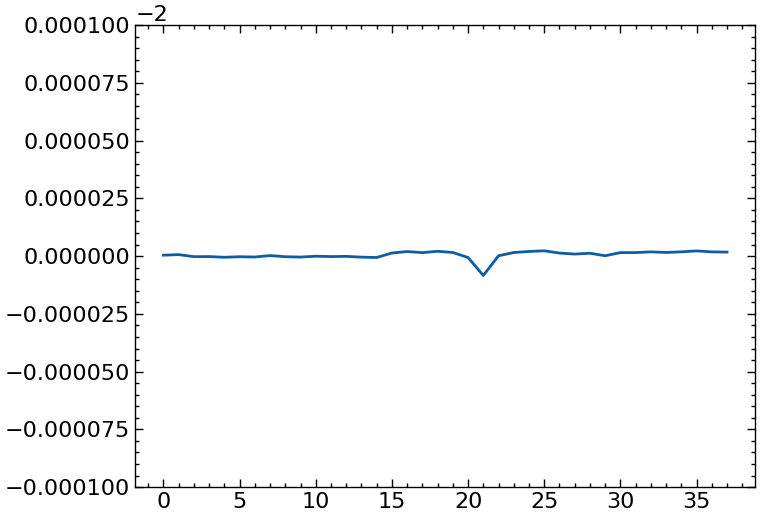

In [7]:
total_charge = [np.sum(atoms.arrays["multipoles"]) for atoms in traj]
plt.plot(total_charge)
# plot y = -2
# plt.plot([0, len(traj)], [-2, -2], "--", color="black")
plt.ylim(-2.0001, -1.9999)

In [8]:
from ase import units
from ase.md.langevin import Langevin
from ase.io import read, write
import numpy as np
import time
from macetools.calculators.polarizable import MACEPolarizable


init_conf = read("./chgnolin_md_snapshot_25_scf_steps.xyz", "0")
# init_conf.set_calculator(calculator)

/opt/conda/envs/mace-scf/lib/python3.11/site-packages/e3nn/o3/_wigner.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  _Jd, _W3j_flat, _W3j_indices = torch.load(os.path.

In [10]:
from tqdm import tqdm
n_iters = range(25)


timings = []
charges = []


calculator = MACEPolarizable(
    model_path="./mace_pol_spice_v1_stage_2_5step_swa.model",
    device="cuda",
    num_scf_steps=25,
    total_charge_key="total_charge",
    constant_charge=True
)
for conf in tqdm(traj):
    conf.set_calculator(calculator)
    start = time.time()
    end = time.time()
    charges.append(np.sum(conf.get_charges()))
    timings.append(end - start)

/home/jhm/software/mace-tools/macetools/calculators/polarizable.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model = torch.load(f=model_path, map_location=self.

Converged in 17 steps


  5%|▌         | 2/38 [00:02<00:40,  1.14s/it]

Converged in 16 steps
Converged in 17 steps


  8%|▊         | 3/38 [00:05<01:16,  2.19s/it]

Converged in 17 steps


 11%|█         | 4/38 [00:08<01:24,  2.50s/it]

Converged in 14 steps


 16%|█▌        | 6/38 [00:12<01:02,  1.95s/it]

Converged in 17 steps


 18%|█▊        | 7/38 [00:12<00:44,  1.43s/it]

Converged in 17 steps


 21%|██        | 8/38 [00:13<00:32,  1.08s/it]

Converged in 15 steps


 24%|██▎       | 9/38 [00:13<00:24,  1.17it/s]

Converged in 16 steps


 26%|██▋       | 10/38 [00:13<00:19,  1.46it/s]

Converged in 14 steps


 29%|██▉       | 11/38 [00:14<00:15,  1.71it/s]

Converged in 17 steps


 32%|███▏      | 12/38 [00:14<00:13,  1.93it/s]

Converged in 17 steps


 34%|███▍      | 13/38 [00:15<00:11,  2.13it/s]

Converged in 17 steps


 37%|███▋      | 14/38 [00:15<00:10,  2.30it/s]

Converged in 16 steps


 39%|███▉      | 15/38 [00:15<00:09,  2.44it/s]

Converged in 16 steps


 42%|████▏     | 16/38 [00:16<00:08,  2.49it/s]

Converged in 18 steps


 45%|████▍     | 17/38 [00:16<00:08,  2.53it/s]

Converged in 18 steps


 47%|████▋     | 18/38 [00:16<00:07,  2.55it/s]

Converged in 18 steps


 50%|█████     | 19/38 [00:17<00:07,  2.65it/s]

Converged in 16 steps


 53%|█████▎    | 20/38 [00:17<00:06,  2.65it/s]

Converged in 18 steps


 55%|█████▌    | 21/38 [00:18<00:06,  2.55it/s]

Converged in 20 steps


 58%|█████▊    | 22/38 [00:18<00:06,  2.44it/s]

Converged in 21 steps


 61%|██████    | 23/38 [00:18<00:05,  2.60it/s]

Converged in 15 steps


 63%|██████▎   | 24/38 [00:19<00:05,  2.55it/s]

Converged in 19 steps


 66%|██████▌   | 25/38 [00:19<00:05,  2.53it/s]

Converged in 19 steps


 68%|██████▊   | 26/38 [00:20<00:04,  2.53it/s]

Converged in 19 steps


 71%|███████   | 27/38 [00:20<00:04,  2.57it/s]

Converged in 18 steps


 74%|███████▎  | 28/38 [00:20<00:03,  2.63it/s]

Converged in 17 steps


 76%|███████▋  | 29/38 [00:21<00:03,  2.63it/s]

Converged in 18 steps


 79%|███████▉  | 30/38 [00:21<00:02,  2.75it/s]

Converged in 15 steps


 82%|████████▏ | 31/38 [00:21<00:02,  2.70it/s]

Converged in 18 steps


 84%|████████▍ | 32/38 [00:22<00:02,  2.69it/s]

Converged in 18 steps


 87%|████████▋ | 33/38 [00:22<00:01,  2.64it/s]

Converged in 19 steps


 89%|████████▉ | 34/38 [00:23<00:01,  2.61it/s]

Converged in 18 steps


 92%|█████████▏| 35/38 [00:23<00:01,  2.56it/s]

Converged in 19 steps


 95%|█████████▍| 36/38 [00:23<00:00,  2.66it/s]

Converged in 16 steps


 97%|█████████▋| 37/38 [00:24<00:00,  2.63it/s]

Converged in 19 steps


100%|██████████| 38/38 [00:24<00:00,  1.55it/s]

Converged in 18 steps


Text(0, 0.5, 'Time taken (s)')

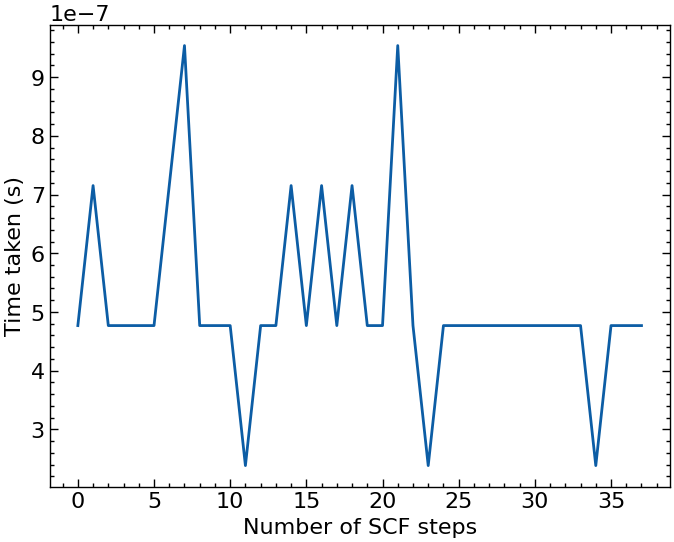

In [11]:
plt.plot(timings)
plt.xlabel("Number of SCF steps")
plt.ylabel("Time taken (s)")

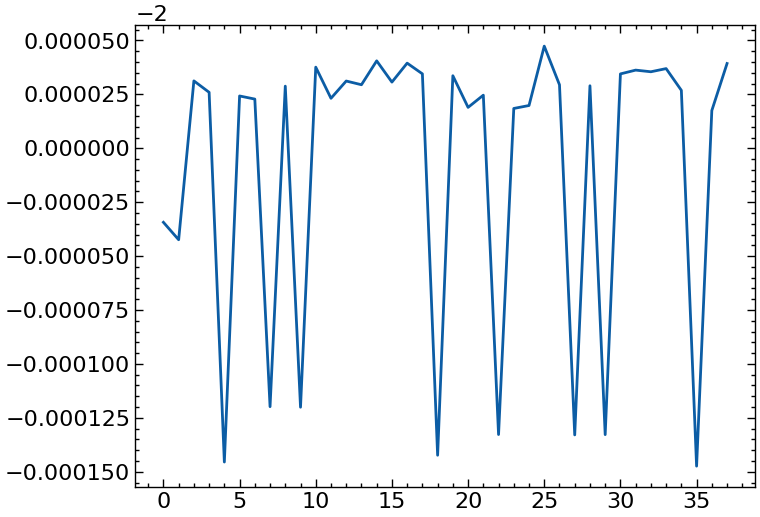

In [12]:
plt.plot()

In [6]:
t1 = time.time()

energy = init_conf.get_potential_energy()
charge = np.sum(init_conf.get_charges())
t2 = time.time()
print(f"Energy: {energy} eV")
print(f"Time: {t2-t1} s")
print(f"Charge: {charge}")


target charge:  tensor([-2.], device='cuda:0')
Energy: -104081.09275856413 eV
Time: 3.3249619007110596 s
Charge: -1.9999999689869667


In [ ]:
import MDAnalysis
from MDAnalysis.tests.datafiles import PSF, DCD   # test trajectory
import numpy.linalg

u = MDAnalysis.Universe(PSF,DCD)  # always start with a Universe
# can access via segid (4AKE) and atom name
# we take the first atom named N and the last atom named C
nterm = u.select_atoms('segid 4AKE and name N')[0]
cterm = u.select_atoms('segid 4AKE and name C')[-1]

bb = u.select_atoms('protein and backbone')  # a selection (AtomGroup)

for ts in u.trajectory:     # iterate through all frames
    r = cterm.position - nterm.position # end-to-end vector from atom positions
    d = numpy.linalg.norm(r)  # end-to-end distance
    rgyr = bb.radius_of_gyration()  # method of AtomGroup
    print("frame = {0}: d = {1} A, Rgyr = {2} A".format(
          ts.frame, d, rgyr))